Gerekli python kütüphanelerinin yüklenmesi


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

Google Drive Bağlantısı

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_dir = '/content/drive/MyDrive/dataset'

In [4]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("\nSınıf İsimleri:", class_names)
NUM_CLASSES = len(class_names)
print("Sınıf Sayısı:", NUM_CLASSES)

Found 107 files belonging to 2 classes.
Using 86 files for training.
Found 107 files belonging to 2 classes.
Using 21 files for validation.

Sınıf İsimleri: ['Hiq Protein Tozu', 'Protein Ocean Creatin']
Sınıf Sayısı: 2


Normalizasyon Katmanı ekleme


In [5]:

normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - accuracy: 0.4688 - loss: 0.7971 - val_accuracy: 0.3333 - val_loss: 0.9778
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5719 - loss: 0.7360 - val_accuracy: 0.3333 - val_loss: 0.8121
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.6225 - loss: 0.5993 - val_accuracy: 0.7619 - val_loss: 0.5667
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.8056 - loss: 0.5706 - val_accuracy: 0.7619 - val_loss: 0.5137
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.8541 - loss: 0.5253 - val_accuracy: 0.8095 - val_loss: 0.5812
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.8231 - loss: 0.4707 - val_accuracy: 0.6667 - val_loss: 0.6463
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.8055 - loss: 0.4453 - val_accuracy: 0.8095 - val_loss: 0.5241
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.8676 - loss: 0.4315

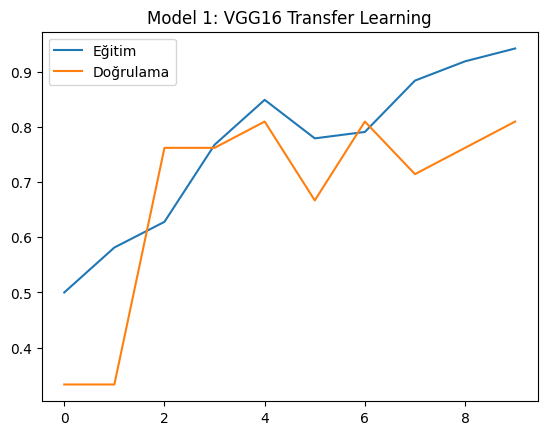

In [6]:
# 1. Hazır Modeli Yükle (VGG16)
base_model = tf.keras.applications.VGG16(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False # Ağırlıkları dondur

# 2. Yeni Sınıflandırma Katmanlarını Ekle
model_1 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax') # 2 sınıfın var
])

# 3. Derle ve Eğit
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_1 = model_1.fit(train_ds, validation_data=val_ds, epochs=10)

# 4. Grafik Çizdir ()
plt.plot(history_1.history['accuracy'], label='Eğitim')
plt.plot(history_1.history['val_accuracy'], label='Doğrulama')
plt.title('Model 1: VGG16 Transfer Learning')
plt.legend()
plt.show()